In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek,SMOTEENN

In [4]:
%matplotlib widget

# Data Inspection and Visualization

In [5]:
url = './cirrhosis.csv'
df = pd.read_csv(url)
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
ID               418 non-null int64
N_Days           418 non-null int64
Status           418 non-null object
Drug             312 non-null object
Age              418 non-null int64
Sex              418 non-null object
Ascites          312 non-null object
Hepatomegaly     312 non-null object
Spiders          312 non-null object
Edema            418 non-null object
Bilirubin        418 non-null float64
Cholesterol      284 non-null float64
Albumin          418 non-null float64
Copper           310 non-null float64
Alk_Phos         312 non-null float64
SGOT             312 non-null float64
Tryglicerides    282 non-null float64
Platelets        407 non-null float64
Prothrombin      416 non-null float64
Stage            412 non-null float64
dtypes: float64(10), int64(3), object(7)
memory usage: 65.4+ KB


In [8]:
#removing IDs
df=df.drop(columns=['ID'])

#visualize NANs
print ("{:<13} {:<15}".format('Features','#Nans'))
print ("------------------------")
for c in df.columns:
    print ("{:<13} {:<15}".format(c,df[c].isna().sum()))

Features      #Nans          
------------------------
N_Days        0              
Status        0              
Drug          106            
Age           0              
Sex           0              
Ascites       106            
Hepatomegaly  106            
Spiders       106            
Edema         0              
Bilirubin     0              
Cholesterol   134            
Albumin       0              
Copper        108            
Alk_Phos      106            
SGOT          106            
Tryglicerides 136            
Platelets     11             
Prothrombin   2              
Stage         6              


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C32D93FF48>]],
      dtype=object)

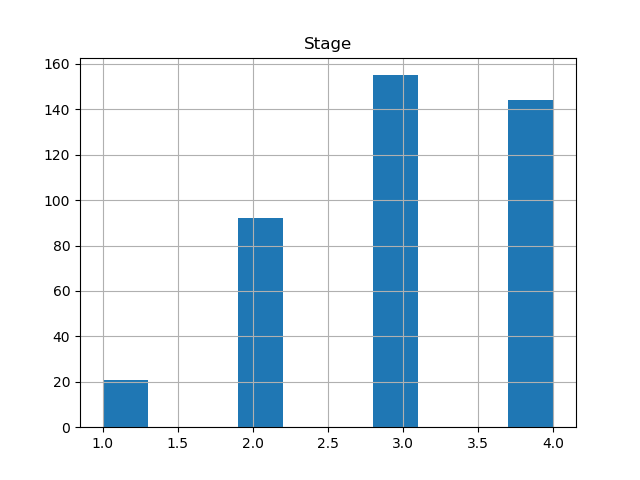

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.25, 'type': 'set_device_pixel_ratio'}


In [9]:
## Target class distribution
df.hist(column="Stage")

In [10]:
df = df.dropna(subset=['Stage']) #throw away data with no target class
df['Drug'] = df['Drug'].fillna('NoDrug') #no drugs used not NaNs

#fill non categoricals
for c in df.columns:
    if df[c].isna().sum()!=0:
        if df[c].dtypes == float:
            print('Non cat',c)
            meanval = df[c].mean()
            print(meanval)
            df[c]=df[c].fillna(value=meanval)

#fill categoricals 
for c in df.columns:
    if df[c].isna().sum()!=0:
        print('Cat',c)
        un = df[c].dropna().unique()
        lenfill=df[c].isna().sum()
        print(lenfill)
        ran = pd.Series(np.random.choice(un, size = lenfill))
        df[c]= df[c].fillna(ran)

Non cat Cholesterol
369.51056338028167
Non cat Copper
97.64838709677419
Non cat Alk_Phos
1982.6557692307692
Non cat SGOT
122.55634615384616
Non cat Tryglicerides
124.70212765957447
Non cat Platelets
256.1022443890274
Non cat Prothrombin
10.733414634146339
Cat Ascites
100
Cat Hepatomegaly
100
Cat Spiders
100


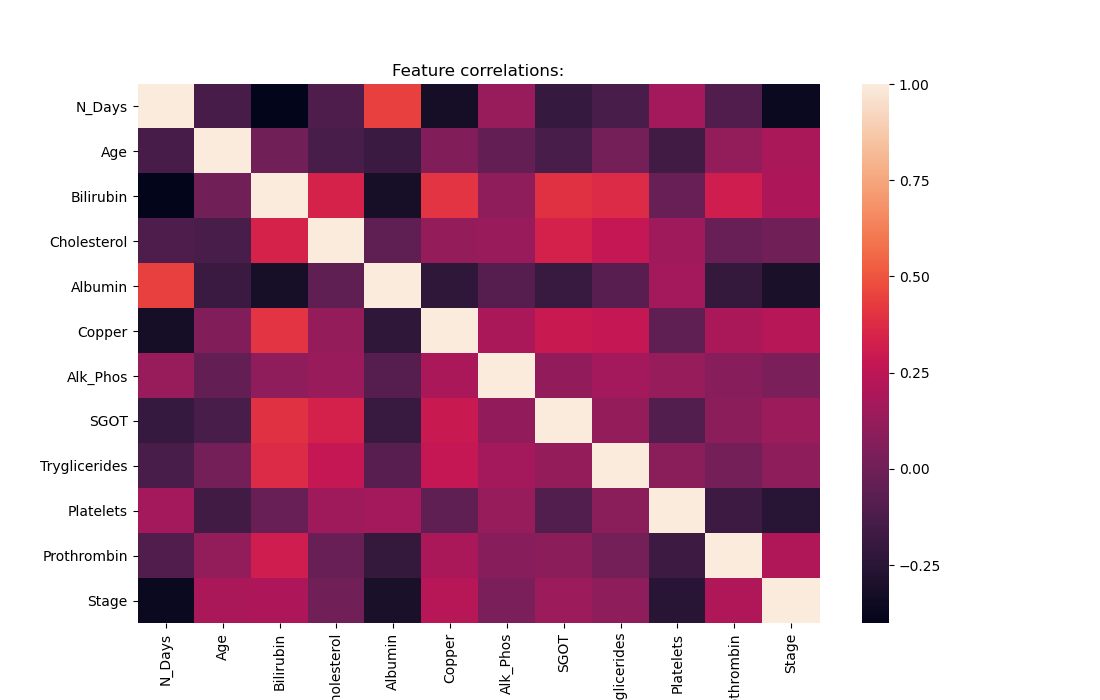

In [11]:
plt.figure(figsize=(11,7))
plt.title('Feature correlations:')
sns.heatmap(df.corr());

# Classification

1) Baselines: XGBoost vs Random Forest

2) Re-Sampling (Up-Up/Down Sampling)

3) Grid Search to tune the best model

In [48]:
for c in df.columns:
    if df[c].dtypes != float:
        df[c] = df[c].astype('category').cat.codes

In [49]:
X = df.drop(columns=['Stage'])
y = df['Stage']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [50]:
target_names=['1','2','3','4']

In [51]:
print('Training set dim:',X_train.shape)
print('Test set dim:    ',X_test.shape)

Training set dim: (329, 18)
Test set dim:     (83, 18)


### XGBoost

In [52]:
xg = XGBClassifier()
y_trainxg=y_train.astype('category').cat.codes
xg.fit(X_train, y_trainxg)
y_predxg = xg.predict(X_test)

In [53]:
y_testxg = y_test.astype('category').cat.codes

In [56]:
y_testxg.unique()

array([2, 1, 3, 0], dtype=int64)

In [57]:
print(classification_report(y_testxg, y_predxg, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
           2       0.24      0.22      0.23        18
           3       0.45      0.54      0.49        28
           4       0.59      0.61      0.60        31

    accuracy                           0.47        83
   macro avg       0.57      0.38      0.40        83
weighted avg       0.50      0.47      0.46        83



### RandomForest

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)

print(classification_report(y_test, y_predrf, target_names=target_names, zero_division="warn"))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.18      0.11      0.14        18
           2       0.37      0.57      0.45        28
           3       0.66      0.61      0.63        31

    accuracy                           0.45        83
   macro avg       0.30      0.32      0.31        83
weighted avg       0.41      0.45      0.42        83



c:\Users\39345\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39345\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39345\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ReSampling

In [68]:
up=True # if True Up else False --> Up/DOwn
if up:
    smNC = SMOTENC(random_state=42, categorical_features=[1,2,4,5,6,7,8])
    X_train_u, y_train_u = smNC.fit_resample(X_train, y_train)
else:
    smT = SMOTETomek(random_state=42)
    X_train_u, y_train_u = smT.fit_resample(X_train, y_train)

X_train_u.shape

(508, 18)

In [75]:
xg_u = XGBClassifier()
y_trainxg_u=y_train_u.astype('category').cat.codes
xg_u.fit(X_train_u, y_trainxg_u)
y_predxg_u = xg_u.predict(X_test)

In [76]:
y_testxg_u = y_test.astype('category').cat.codes

In [77]:
print('Test Report')
print(classification_report(y_testxg_u, y_predxg_u, target_names=target_names))

Test Report
              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.21      0.22      0.22        18
           3       0.39      0.39      0.39        28
           4       0.55      0.55      0.55        31

    accuracy                           0.43        83
   macro avg       0.49      0.46      0.47        83
weighted avg       0.44      0.43      0.44        83



## GridSearchCV

In [40]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3,5,10,15,18]
        }

metric = 'f1_macro'

xgb = XGBClassifier()
clf = GridSearchCV(xgb, params,scoring = metric)
clf.fit(X_train_u, y_trainxg_u)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     n

In [41]:
print('Best parameters',clf.best_params_)
print('Best score',clf.best_score_)

Best parameters {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
Best score 0.6885636844865994


In [64]:
best_model = XGBClassifier(colsample_bytree= .8, gamma= .5, max_depth= 5, min_child_weight= 1, subsample= 0.8)
best_model.fit(X_train_u, y_trainxg_u)
y_pred=best_model.predict(X_test)
print(classification_report(y_testxg_u, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.21      0.22      0.22        18
           3       0.46      0.46      0.46        28
           4       0.55      0.55      0.55        31

    accuracy                           0.46        83
   macro avg       0.51      0.48      0.49        83
weighted avg       0.46      0.46      0.46        83



In [46]:
y_pred

array([2, 2, 3, 2, 3, 3, 2, 0, 3, 1, 2, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3,
       3, 1, 2, 1, 3, 3, 3, 2, 3, 3, 2, 2, 1, 1, 1, 1, 2, 0, 3, 1, 1, 1,
       1, 1, 0, 3, 2, 3, 2, 3, 3, 2, 0, 0, 1, 2, 2, 3, 3, 2, 2, 2, 3, 0,
       3, 2, 1, 3, 0, 2, 1, 3, 2, 2, 3, 2, 3, 2, 3, 1, 3], dtype=int64)

In [58]:
y_testxg

272    2
55     1
238    3
33     1
286    3
      ..
153    2
198    2
84     3
412    2
172    1
Length: 83, dtype: int8